In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [2]:
### Step 1: Import the CRYPTO dataset into a Pandas DataFrame.

In [3]:
# Import the Crypto dataset into a Pandas Dataframe

btc_df = pd.read_csv(
    Path("Resources/augmento_btc.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

btc_df.rename(columns={"listing_close": "BTC Price"}, inplace=True)

# Review the DataFrame
btc_df.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_25420\1719597672.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  btc_df = pd.read_csv(


,BTC Price,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,706.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,1.0,12.0
2016-11-01 02:00:00,709.99,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,8.0
2016-11-01 03:00:00,708.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,7.0
2016-11-01 04:00:00,702.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,5.0
2016-11-01 05:00:00,708.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,1.0,7.0


In [4]:
# Plot the actual returns versus the strategy returns
fig = px.line(btc_df, y='BTC Price', title="Historical Price For BTC")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

c:\Users\chris\anaconda3\envs\dev\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [5]:
# Group data by daily
#grouped_btc_df = bitcoin_df.groupby(pd.Grouper(key='date', freq='D'))
#grouped_btc_df.head()

In [6]:
# Filter the date index and close columns
#signals_df = btc_df.loc[:, ["listing_close]]
signals_df = btc_df.copy()
signals_df.sort_index(ascending=False)

# Use the pct_change function to generate returns from close prices
signals_df["Actual_Returns"] = signals_df["BTC Price"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())

C:\Users\chris\AppData\Local\Temp\ipykernel_25420\2048996337.py:7: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



,BTC Price,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 02:00:00,709.99,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,8.0,0.005652
2016-11-01 03:00:00,708.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,7.0,-0.002042
2016-11-01 04:00:00,702.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,5.0,-0.008031
2016-11-01 05:00:00,708.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.0,3.0,0.0,0.0,0.0,1.0,7.0,0.008039
2016-11-01 06:00:00,709.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,6.0,0.001129


In [7]:
### Step 2: Generate trading signals using short- and long-window SMA values. 

In [8]:
# Set the short window and long window
short_window = 1
long_window = 10

# Generate the fast and slow simple moving averages (1 and 10 days, respectively)
signals_df['SMA_Fast'] = signals_df['BTC Price'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['BTC Price'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())

,BTC Price,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,728.17,0.0,3.0,3.0,1.0,0.0,0.0,0.0,5.0,0.0,...,10.0,2.0,0.0,1.0,0.0,1.0,10.0,0.011966,728.17,714.247
2016-11-01 12:00:00,728.01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,6.0,2.0,0.0,0.0,0.0,3.0,11.0,-0.000220,728.01,716.049
2016-11-01 13:00:00,731.72,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,8.0,4.0,0.0,3.0,0.0,4.0,17.0,0.005096,731.72,718.367
2016-11-01 14:00:00,728.55,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,...,15.0,2.0,0.0,1.0,0.0,2.0,16.0,-0.004332,728.55,720.937
2016-11-01 15:00:00,722.38,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,9.0,3.0,0.0,5.0,0.0,6.0,13.0,-0.008469,722.38,722.325


In [9]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual_Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual_Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())

,BTC Price,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,728.17,0.0,3.0,3.0,1.0,0.0,0.0,0.0,5.0,0.0,...,2.0,0.0,1.0,0.0,1.0,10.0,0.011966,728.17,714.247,1.0
2016-11-01 12:00:00,728.01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,3.0,11.0,-0.000220,728.01,716.049,-1.0
2016-11-01 13:00:00,731.72,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,4.0,0.0,3.0,0.0,4.0,17.0,0.005096,731.72,718.367,1.0
2016-11-01 14:00:00,728.55,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,...,2.0,0.0,1.0,0.0,2.0,16.0,-0.004332,728.55,720.937,-1.0
2016-11-01 15:00:00,722.38,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,0.0,5.0,0.0,6.0,13.0,-0.008469,722.38,722.325,-1.0


In [10]:
signals_df['Signal'].value_counts()

Signal
 1.0    32150
-1.0    30339
Name: count, dtype: int64

In [11]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy_Returns'] = signals_df['Actual_Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())

,BTC Price,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,Actual_Returns,SMA_Fast,SMA_Slow,Signal,Strategy_Returns
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,728.17,0.0,3.0,3.0,1.0,0.0,0.0,0.0,5.0,0.0,...,0.0,1.0,0.0,1.0,10.0,0.011966,728.17,714.247,1.0,NaN
2016-11-01 12:00:00,728.01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,3.0,11.0,-0.000220,728.01,716.049,-1.0,-0.000220
2016-11-01 13:00:00,731.72,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,3.0,0.0,4.0,17.0,0.005096,731.72,718.367,1.0,-0.005096
2016-11-01 14:00:00,728.55,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,...,0.0,1.0,0.0,2.0,16.0,-0.004332,728.55,720.937,-1.0,-0.004332
2016-11-01 15:00:00,722.38,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,0.0,6.0,13.0,-0.008469,722.38,722.325,-1.0,0.008469


In [12]:
### Step 3: Split the data into training and testing datasets.

In [13]:
# Create new feature data frame called X
X = signals_df.drop(['BTC Price','Signal','Actual_Returns','Strategy_Returns'], axis=1)
X.shift().dropna()

# Review the DataFrame
X.head()

,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,...,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative,SMA_Fast,SMA_Slow
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 11:00:00,0.0,3.0,3.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,...,1.0,10.0,2.0,0.0,1.0,0.0,1.0,10.0,728.17,714.247
2016-11-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,6.0,2.0,0.0,0.0,0.0,3.0,11.0,728.01,716.049
2016-11-01 13:00:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,8.0,4.0,0.0,3.0,0.0,4.0,17.0,731.72,718.367
2016-11-01 14:00:00,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,15.0,2.0,0.0,1.0,0.0,2.0,16.0,728.55,720.937
2016-11-01 15:00:00,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,9.0,3.0,0.0,5.0,0.0,6.0,13.0,722.38,722.325


In [14]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(X)
scaled_data


array([[-0.24765984,  2.92359234,  0.7891581 , ..., -0.87589531,
        -1.10967472, -1.11051079],
       [-0.24765984, -0.59753198, -0.72190979, ..., -0.84323747,
        -1.10968462, -1.11039924],
       [-0.24765984,  0.57617612, -0.72190979, ..., -0.64729043,
        -1.10945499, -1.11025575],
       ...,
       [-0.24765984,  1.74988423, -0.72190979, ..., -0.25539634,
         1.54906877,  1.5450415 ],
       [-0.24765984, -0.59753198, -0.72190979, ..., -0.35336987,
         1.55210162,  1.54546245],
       [-0.24765984, -0.59753198, -0.72190979, ..., -0.51665907,
         1.5691227 ,  1.54811195]])

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=6)

In [16]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca_data = pca.fit_transform(scaled_data)

# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[-4.25283536, -4.01544498, -0.56087721,  0.45897552, -1.01225605,
         0.49095586],
       [-4.1563639 , -4.41004058, -1.11692008,  0.48091014, -0.96494764,
         0.3401388 ],
       [-4.43159656, -4.37698989, -0.98390911,  0.48377188, -1.05058628,
         0.01212995],
       [-3.21182728, -4.49592115, -0.83084284, -0.13300233, -1.22107942,
         0.27653639],
       [-3.46705756, -3.67406739,  0.38818559,  1.99972257, -0.89887718,
         0.40935017]])

In [17]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.22541198, 0.1024698 , 0.03486159, 0.01468479, 0.01254214,
       0.00958109])

In [18]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_pca_data, columns=["PC1","PC2","PC3","PC4","PC5","PC6"])
df_market_pca.head(10)

# Copy the crypto names from the original data
df_market_pca["date"] = X.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("date")

# Display sample data
df_market_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
date,,,,,,
2016-11-01 11:00:00,-4.252835,-4.015445,-0.560877,0.458976,-1.012256,0.490956
2016-11-01 12:00:00,-4.156364,-4.410041,-1.116920,0.480910,-0.964948,0.340139
2016-11-01 13:00:00,-4.431597,-4.376990,-0.983909,0.483772,-1.050586,0.012130
2016-11-01 14:00:00,-3.211827,-4.495921,-0.830843,-0.133002,-1.221079,0.276536
2016-11-01 15:00:00,-3.467058,-3.674067,0.388186,1.999723,-0.898877,0.409350


In [19]:
X = df_market_pca.copy()
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6
date,,,,,,
2016-11-01 11:00:00,-4.252835,-4.015445,-0.560877,0.458976,-1.012256,0.490956
2016-11-01 12:00:00,-4.156364,-4.410041,-1.116920,0.480910,-0.964948,0.340139
2016-11-01 13:00:00,-4.431597,-4.376990,-0.983909,0.483772,-1.050586,0.012130
2016-11-01 14:00:00,-3.211827,-4.495921,-0.830843,-0.133002,-1.221079,0.276536
2016-11-01 15:00:00,-3.467058,-3.674067,0.388186,1.999723,-0.898877,0.409350


In [20]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    32150
-1.0    30339
Name: count, dtype: int64

In [21]:
# Review y head
y.head()

date
2016-11-01 11:00:00    1.0
2016-11-01 12:00:00   -1.0
2016-11-01 13:00:00    1.0
2016-11-01 14:00:00   -1.0
2016-11-01 15:00:00   -1.0
Name: Signal, dtype: float64

In [22]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2016-11-01 11:00:00


In [23]:
# Select the ending period for the training data with an offset of 48 months
training_end = X.index.min() + DateOffset(months=48)

# Display the training end date
print(training_end)

2020-11-01 11:00:00


In [24]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()
X_train.tail()
X_train.count()

PC1    35061
PC2    35061
PC3    35061
PC4    35061
PC5    35061
PC6    35061
dtype: int64

In [25]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(months=0):]
y_test = y.loc[training_end+DateOffset(months=0):]

# Review the X_test DataFrame
X_test.head()
X_test.tail()
X_test.count()

PC1    27429
PC2    27429
PC3    27429
PC4    27429
PC5    27429
PC6    27429
dtype: int64

In [26]:
### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data.

In [27]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[-0.68823509, -0.35393588, -0.28588237, -0.02443156, -0.38790763,
         0.29435267],
       [-0.67744834, -0.46142316, -0.44240807, -0.01415846, -0.3560408 ,
         0.18858421],
       [-0.70822289, -0.4524202 , -0.40496557, -0.01281816, -0.41372677,
        -0.04144936],
       ...,
       [-0.62033012,  1.15002727, -0.66022947,  0.50436252, -0.05705492,
         0.09693758],
       [-0.72271878,  0.81707721, -0.64166016,  0.26261541, -0.56122425,
         0.15148689],
       [-0.60531264,  0.60859256, -0.3685132 ,  0.41841977,  1.06995491,
        -0.16561343]])

In [28]:
# From SVM, instantiate SVC classifier model instance
from sklearn import svm
from sklearn.metrics import classification_report

svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_train_scaled)

# Review the model's predicted values
svm_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [30]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_training = svm_model.predict(X_train_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_training_report = classification_report(y_train, testing_signal_training)

# Print the classification report
print(svm_training_report)

              precision    recall  f1-score   support

        -1.0       0.62      0.10      0.17     16891
         1.0       0.53      0.94      0.68     18170

    accuracy                           0.54     35061
   macro avg       0.57      0.52      0.42     35061
weighted avg       0.57      0.54      0.43     35061



In [31]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.61      0.54     13449
         1.0       0.51      0.40      0.45     13980

    accuracy                           0.50     27429
   macro avg       0.50      0.50      0.50     27429
weighted avg       0.50      0.50      0.50     27429



In [32]:
### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [33]:
# Create a new empty predictions DataFrame:
predictions_df = pd.DataFrame(index=X_test.index)

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df["Predicted"] = testing_signal_predictions

# Add the actual returns to the DataFrame
predictions_df["Actual_Returns"] = signals_df["Actual_Returns"]

# Add the strategy returns to the DataFrame
predictions_df["Strategy_Returns"] = (
    predictions_df["Actual_Returns"] * predictions_df["Predicted"]
)

# Review the DataFrame
display(predictions_df.tail(10))

,Predicted,Actual_Returns,Strategy_Returns
date,,,
2023-12-21 01:00:00,-1.0,-0.002616,0.002616
2023-12-21 02:00:00,-1.0,-0.001748,0.001748
2023-12-21 03:00:00,-1.0,0.006038,-0.006038
2023-12-21 04:00:00,-1.0,-0.000641,0.000641
2023-12-21 05:00:00,-1.0,-0.002567,0.002567
2023-12-21 06:00:00,-1.0,0.006504,-0.006504
2023-12-21 07:00:00,-1.0,-0.000959,0.000959
2023-12-21 08:00:00,-1.0,-0.001577,0.001577
2023-12-21 09:00:00,-1.0,0.001122,-0.001122


In [34]:
### Save predictions to csv for backtesting
predictions_df.to_csv('Resources\BTC_AUG_PCA6_predictions.csv', index= 'date')

### Save predictions to csv for backtesting
predictions_df.to_csv('Resources\BTC_AUG_PCA6_predictions.csv', index= 'date')

In [35]:
### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<Axes: title={'center': 'BTC-PCA6'}, xlabel='date'>

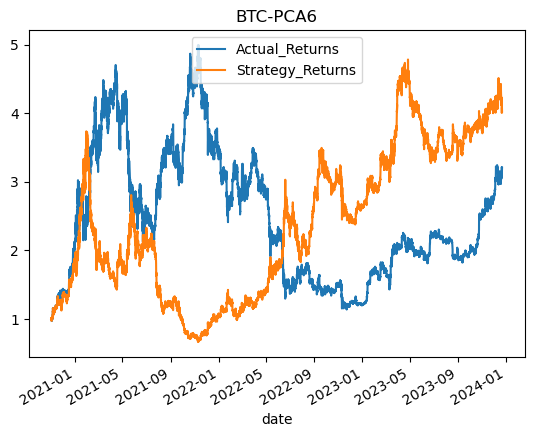

In [36]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual_Returns", "Strategy_Returns"]]).cumprod().plot(title="BTC-PCA6")

In [37]:
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import time

# Initialize Alpaca API
api = tradeapi.REST('PKQD2ND8DVB2JMRYN7RU', 'P7G64gQ0PjnK4LZZ3V7R04qLdJj9WC9ajifMN52Z', base_url='https://paper-api.alpaca.markets')  # Use the paper trading API for testing

# Get the current date and time
current_datetime = datetime.now()
#current_date = current_datetime.strftime('%Y-%m-%d')
current_hour = current_datetime.strftime('%H:%M:%S')
start_datetime = current_datetime - timedelta(days=30)

# Slicing by current date minus 30 days in the past to make our data and hour
sliced_df = predictions_df["Predicted"].loc[f'{start_datetime} {current_hour}':]

# if using live hourly data use this
# sliced_df = predictions_df["Predicted"].loc[f'{current_date} {current_hour}':]

while True:
    # Get account information to check available quantity of BTCUSD
    # position_info = api.get_position('BTCUSD')
    # btcusd_qty_available = float(position_info.qty)
    btcusd_qty_available = 0

    # sliced_df contains our predictions for the training set
    # You may adjust this based on your specific signal values (e.g., -1 for sell, 1 for buy, 0 for hold)
    for i, signal in enumerate(sliced_df):
        if signal == 1 and btcusd_qty_available > 0:  # Buy signal and available quantity is greater than 0
            # Place a market order to buy
            api.submit_order(
                symbol='BTCUSD',  # Replace with the stock symbol you want to trade
                qty=1,  # Adjust the quantity based on your strategy
                side='buy',
                type='market',
                time_in_force='gtc'
            )
        elif signal == -1 and btcusd_qty_available > 0:  # Sell signal and available quantity is greater than 0
            # Place a market order to sell
            api.submit_order(
                symbol='BTCUSD',
                qty=1,
                side='sell',
                type='market',
                time_in_force='gtc'
        )
        # Sleep for a specific duration (adjust as needed)
        time.sleep(60) # Sleep for 60 seconds
        #time.sleep(3600) # Sleep for 1 hour to mimic dataset hourly data